In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Explore

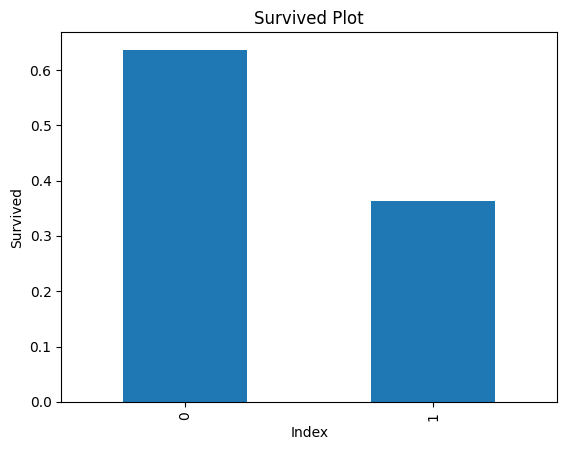

In [5]:
df['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Index')
plt.ylabel('Survived')
plt.title('Survived Plot')
plt.show()

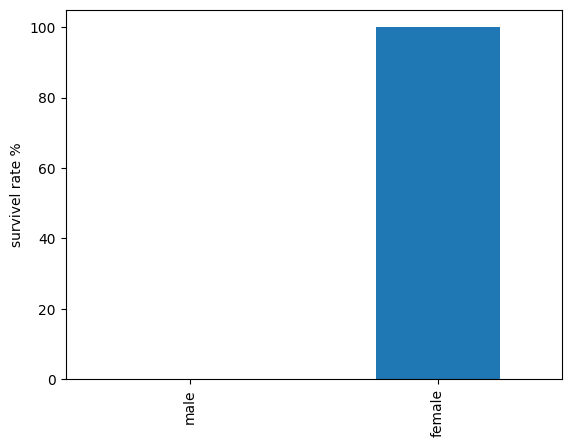

In [6]:
# Sex
unique_values = df['Sex'].unique()
percentages = {}
for value in unique_values:
  subset = df[df['Sex'] == value]
  survived_count = subset['Survived'].sum()
  total_count = len(subset)
  if total_count >0:
    percentage = (survived_count/total_count)* 100
    percentages[value] =percentage

pd.Series(percentages).plot(kind='bar')
plt.ylabel('survivel rate %');

In [7]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

<BarContainer object of 1 artists>

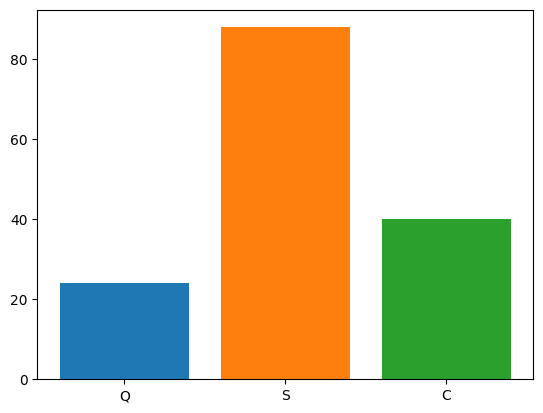

In [8]:
# Plot Embarked with Survided columns

maskq = (df['Survived'] == 1) & (df['Embarked'] == 'Q')
masks = (df['Survived'] == 1) & (df['Embarked'] == 'S')
maskc = (df['Survived'] == 1) & (df['Embarked'] == 'C')

maskq=maskq.value_counts().min()
masks=masks.value_counts().min()
maskc=maskc.value_counts().min()

plt.bar('Q',maskq)
plt.bar('S',masks)
plt.bar('C',maskc)


<ipython-input-9-c4e9b9801bd0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='Survived').corr()


<Axes: >

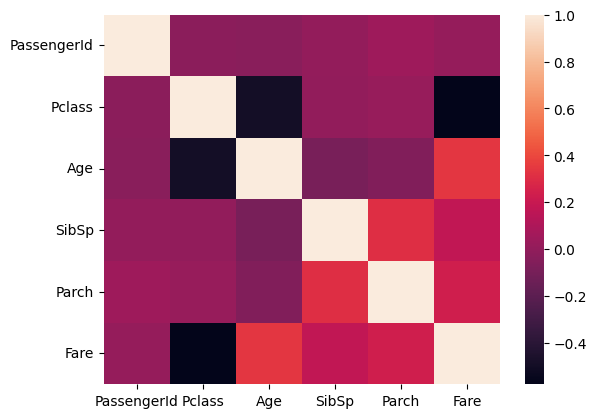

In [9]:
corr = df.drop(columns='Survived').corr()
sns.heatmap(corr)

# Clean Data

In [10]:
df.drop(columns=['Survived','Pclass']).describe()

,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,30.272590,0.447368,0.392344,35.627188
std,120.810458,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
# fill Age with mean values
df['Age']=df['Age'].fillna(int(df['Age'].mean()))
# Also Fare
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [12]:
# Drop unuseful value
df.drop(columns=['Name','Cabin','Ticket','PassengerId'],inplace=True)

In [13]:
# Convert male to value 0 and female to 1 in Sex column
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

In [14]:
# Convert Q to 0, S to 1, C to 2 in Embrked columns
df['Embarked'] = df['Embarked'].replace({'Q': 0, 'S': 1, 'C': 2})

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


# Model

In [17]:
target ='Survived'
X = df.drop(columns=target)
y = df[target]

## Baseline

In [18]:
y_pred_baseline = df['Survived'].value_counts(normalize=True).max()

## Iterate

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=55)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(334, 7)
(334,)
(84, 7)
(84,)


In [20]:
def models(X_train,Y_train):

  #logistic regression
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
  knn.fit(X_train,Y_train)

  #decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train,Y_train)

  #random forest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train,Y_train)

  #show training accuracy
  print('[0] logistic regression accuracy:', log.score(X_train, Y_train))
  print('[1] K Neighbors accuracy:', knn.score(X_train, Y_train))
  print('[2] Decision Tree accuracy:', tree.score(X_train, Y_train))
  print('[3] Random forest accuracy:', forest.score(X_train, Y_train))

  return log, knn, tree, forest

## Evaluate

In [21]:
model=models(X_train,y_train)

[0] logistic regression accuracy: 1.0
[1] K Neighbors accuracy: 0.7844311377245509
[2] Decision Tree accuracy: 1.0
[3] Random forest accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#confusion matrix and accuracy for the 3 models on the test data

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm= confusion_matrix(y_test, model[i].predict(X_test))

  #extract TN, FP, TP, FN
  TN, FP, TP, FN= confusion_matrix(y_test, model[i].predict(X_test)).ravel()

  testScore= (TP+TN)/(TP+TN+FP+FN)

  print(cm)
  print('Model[{}] Testing accuracy "{}'.format(i, testScore ))

  print()

[[58  0]
 [ 0 26]]
Model[0] Testing accuracy "0.6904761904761905

[[46 12]
 [15 11]]
Model[1] Testing accuracy "0.7261904761904762

[[58  0]
 [ 0 26]]
Model[2] Testing accuracy "0.6904761904761905

[[58  0]
 [ 0 26]]
Model[3] Testing accuracy "0.6904761904761905



In [23]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

<Axes: >

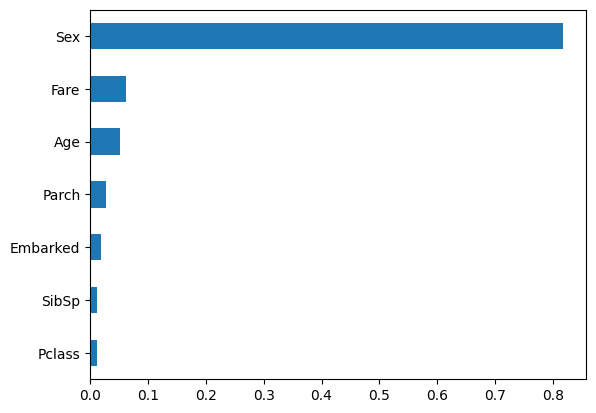

In [24]:
features = X_train.columns
# Extract importances from model
importances = forest.feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')